# Analysis & Plot the Asphalt Binder MSCR Test

This notebook includes the codes for plotting and statistical analysis on the results of Multiple Stress Creep Recovery (MSCR) test on different recovered and tank binders used in the PTF lanes. 

Author: Farhad Abdollahi (farhad.abdollahi.ctr@dot.gov) 

Date: 05/19/2025

___

In [26]:
# Importing the required libraries. 
import os
import pickle
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from Statistical_Analysis import Tukey_Grouping
from scipy.stats import ttest_ind, t

In [27]:
# User input variables. 
MainDataFileName = './Data/Data.xlsx'
OutputDir        = '../_Figures'

_______

In [28]:
# Read the MSCR results. 
MSCR = pd.read_excel(MainDataFileName, sheet_name='MSCR', usecols='A:M', skiprows=1, 
                     names=['Lane', 'Field_Aging', 'Lab_Aging', 'ID', 'RepNum', 'Temperature', 
                            'R0.1', 'R3.2', 'Rdiff', 'Jnr0.1', 'Jnr3.2', 'Jnrdiff', 'TrafficGrade'])
MSCR['Jnrdiff'] *= 100
MSCR['Rdiff']   *= 100
MSCR['R3.2']    *= 100
MSCR['R0.1']    *= 100
MSCR.head()

,Lane,Field_Aging,Lab_Aging,ID,RepNum,Temperature,R0.1,R3.2,Rdiff,Jnr0.1,Jnr3.2,Jnrdiff,TrafficGrade
0,1,0-Month,NaN,7196,1,64,42.96,36.71,14.548417,0.1889,0.2111,11.752250,E
1,1,0-Month,NaN,7196,2,64,42.96,36.73,14.501862,0.1869,0.2088,11.717496,E
2,1,0-Month,NaN,7196,3,64,43.04,36.72,14.684015,0.1886,0.2114,12.089077,E
3,2,0-Month,NaN,7197,1,64,42.22,34.44,18.427286,0.2432,0.2797,15.008224,E
4,2,0-Month,NaN,7197,2,64,42.46,34.52,18.699953,0.2480,0.2864,15.483871,E


In [29]:
# Create a new dictionary for the analyzed results. 
MSCRRes = {'Lane': [], 'Field_Aging': [], 'Num_Data': []}
for id in ['R0.1', 'R3.2', 'Rdiff', 'Jnr0.1', 'Jnr3.2', 'Jnrdiff']:
    MSCRRes[f'{id}_Mean'] = []
    MSCRRes[f'{id}_Std'] = []
    MSCRRes[f'{id}_Values'] = []
# Calculate the average and std of the measurements. 
for ln in MSCR['Lane'].unique():            # Iterate over different lanes. 
    MSCR_L = MSCR[MSCR['Lane'] == ln]
    for age in MSCR_L['Field_Aging'].unique():      # Iterate over the field aging (tank binder or 0-month recovered binder)
        MSCR_LF = MSCR_L[(MSCR_L['Field_Aging'] == age) & (MSCR_L['R0.1'] != '-')]
        # Extract the values. 
        R01   = MSCR_LF['R0.1'].to_numpy()
        R32   = MSCR_LF['R3.2'].to_numpy()
        Rdiff = MSCR_LF['Rdiff'].to_numpy()
        # Store the results. 
        MSCRRes['Lane'].append(ln)
        MSCRRes['Field_Aging'].append(age)
        MSCRRes['Num_Data'].append(len(MSCR_LF))
        for id in ['R0.1', 'R3.2', 'Rdiff', 'Jnr0.1', 'Jnr3.2', 'Jnrdiff']:
            Values = MSCR_LF[id].to_numpy().astype('float')
            MSCRRes[f'{id}_Mean'].append(Values.mean())
            MSCRRes[f'{id}_Std'].append(Values.std())
            MSCRRes[f'{id}_Values'].append(','.join(map(str, np.round(Values, 6))))
# Convert the "MSCRRes" to a dataframe. 
MSCRRes = pd.DataFrame(MSCRRes)
MSCRRes = MSCRRes.sort_values(by=['Lane', 'Field_Aging'])
MSCRRes.head()

,Lane,Field_Aging,Num_Data,R0.1_Mean,R0.1_Std,R0.1_Values,R3.2_Mean,R3.2_Std,R3.2_Values,Rdiff_Mean,...,Rdiff_Values,Jnr0.1_Mean,Jnr0.1_Std,Jnr0.1_Values,Jnr3.2_Mean,Jnr3.2_Std,Jnr3.2_Values,Jnrdiff_Mean,Jnrdiff_Std,Jnrdiff_Values
0,1,0-Month,3,42.986667,0.037712,"42.96,42.96,43.04",36.720000,0.008165,"36.71,36.73,36.72",14.578098,...,"14.548417,14.501862,14.684015",0.188133,0.000881,"0.1889,0.1869,0.1886",0.210433,0.001161,"0.2111,0.2088,0.2114",11.852941,0.167575,"11.75225,11.717496,12.089077"
1,1,Tank binder,3,42.553333,0.051854,"42.59,42.59,42.48",27.860000,0.149666,"27.7,27.82,28.06",34.530254,...,"34.961259,34.679502,33.95",0.640900,0.006730,"0.6473,0.6438,0.6316",0.848833,0.012154,"0.8606,0.8538,0.8321",32.440363,0.506785,"32.952263,32.618826,31.75"
2,2,0-Month,3,42.336667,0.098093,"42.22,42.46,42.33",34.493333,0.037712,"34.44,34.52,34.52",18.525837,...,"18.427286,18.699953,18.450272",0.243967,0.003029,"0.2432,0.248,0.2407",0.281100,0.003884,"0.2797,0.2864,0.2772",15.218733,0.197987,"15.008224,15.483871,15.164105"
3,2,Tank binder,3,15.453333,0.038586,"15.47,15.4,15.49",5.963333,0.824958,"5.38,5.38,7.13",61.429316,...,"65.223012,65.064935,54.0",1.254500,0.003822,"1.2586,1.2494,1.2555",1.500067,0.030415,"1.5267,1.516,1.4575",19.576563,2.465418,"21.301446,21.338242,16.09"
4,3,0-Month,3,18.566667,0.117284,"18.73,18.51,18.46",10.933333,0.028674,"10.97,10.9,10.93",41.111557,...,"41.43086,41.112912,40.790899",0.386667,0.008511,"0.3756,0.3881,0.3963",0.434233,0.008344,"0.4234,0.4356,0.4437",12.308685,0.316430,"12.726305,12.239114,11.960636"


### Now plotting the same results based on the binder types. 

In this section we have grouped the binders into: (i) controls with 20% RAP, lanes 3, 6, 9, (ii) polymer modified with 20% RAP, lanes 1, 2, 4; (iii) high-RAP with 40% RAP, lanes 5, 7, 8; and (iv) No RAP lane 10. 

# Jnr 3.2

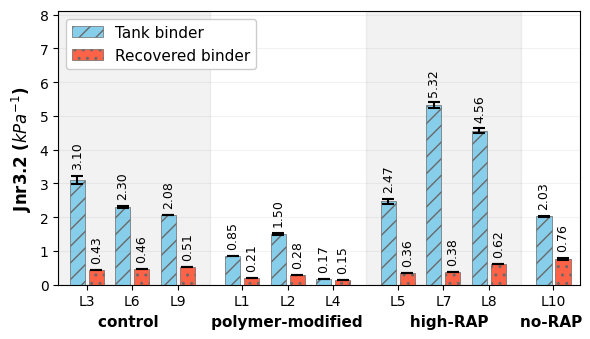

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))
ax.axvspan(xmin=-1,   xmax=7.0, color='gray', alpha=0.1)
ax.axvspan(xmin=15.2, xmax=23.4, color='gray', alpha=0.1)
XPositions = np.array([2.4 * i + j + 0.0 for i in range(0, 3) for j in range(2)] + \
                      [2.4 * i + j + 1.0 for i in range(3, 6) for j in range(2)] + \
                      [2.4 * i + j + 2.0 for i in range(6, 9) for j in range(2)] + \
                      [2.4 * i + j + 3.0 for i in range(9, 10) for j in range(2)])
ax.bar(XPositions[::2], 
       height=MSCRRes['Jnr3.2_Mean'].to_numpy()[[5, 11, 17, 1, 3, 7, 9, 13, 15, 19]], 
       yerr=MSCRRes['Jnr3.2_Std'].to_numpy()[[5, 11, 17, 1, 3, 7, 9, 13, 15, 19]], 
       width=0.8, edgecolor='dimgray', lw=0.5, color='skyblue', hatch='//', label='Tank binder',
       error_kw={'capsize': 4, 'capthick': 1.5, 'elinewidth': 1.5, 'ecolor': 'black'})
ax.bar(XPositions[1::2], 
       height=MSCRRes['Jnr3.2_Mean'].to_numpy()[[4, 10, 16, 0, 2, 6, 8, 12, 14, 18]], 
       yerr=MSCRRes['Jnr3.2_Std'].to_numpy()[[4, 10, 16, 0, 2, 6, 8, 12, 14, 18]], 
       width=0.8, edgecolor='dimgray', lw=0.5, color='tomato', hatch='..', label='Recovered binder', 
       error_kw={'capsize': 4, 'capthick': 1.5, 'elinewidth': 1.5, 'ecolor': 'black'})
ax.set_ylim([0, 8.1])
ax.set_xticks(XPositions[::2] + 0.5)
ax.set_xticklabels([f'L{i}' for i in [3, 6, 9, 1, 2, 4, 5, 7, 8, 10]], fontsize=10, color='k', rotation=0)
ax.set_ylabel('Jnr3.2 ($kPa^{-1}$)', fontsize=12, fontweight='bold', color='k')
ax.set_xlabel('        control          polymer-modified         high-RAP      no-RAP', 
              fontsize=11, fontweight='bold', color='k')
for i, idx in enumerate([4, 10, 16, 0, 2, 6, 8, 12, 14, 18]):
    ax.text(XPositions[2*i+1], MSCRRes['Jnr3.2_Mean'][idx+0] + MSCRRes['Jnr3.2_Std'][idx+0] + 0.2, 
            f'{MSCRRes["Jnr3.2_Mean"][idx+0]:.2f}', ha='center', va='bottom', fontsize=9, rotation=90)
    ax.text(XPositions[2*i+0], MSCRRes['Jnr3.2_Mean'][idx+1] + MSCRRes['Jnr3.2_Std'][idx+1] + 0.2, 
            f'{MSCRRes["Jnr3.2_Mean"][idx+1]:.2f}', ha='center', va='bottom', fontsize=9, rotation=90)
ax.set_xlim([-1.0, 26.5])
ax.grid(axis='y', color='gray', alpha=0.1)
ax.legend(fontsize=11, ncol=1, loc='upper left', framealpha=1.0)
fig.tight_layout()
# fig.savefig(os.path.join(OutputDir, f'Binder_HTPG.png'), format='png', dpi=1000)
# fig.savefig(os.path.join(OutputDir, f'Binder_HTPG.svg'), format='svg')

In [31]:
data_Tank      = {'value': [], 'group': []}
data_Recovered = {'value': [], 'group': []}
for ln in range(1, 11):
    Tank      = MSCR[(MSCR['Lane'] == ln) & (MSCR['Field_Aging'] == 'Tank binder')]
    Recovered = MSCR[(MSCR['Lane'] == ln) & (MSCR['Field_Aging'] == '0-Month')]
    for i in range(len(Tank)):
        if np.isnan(Tank.iloc[i]['Jnr3.2']): continue
        data_Tank['value'].append(Tank.iloc[i]['Jnr3.2'])
        data_Tank['group'].append(f'L{ln:02d}')
    for i in range(len(Recovered)):
        if np.isnan(Recovered.iloc[i]['Jnr3.2']): continue
        data_Recovered['value'].append(Recovered.iloc[i]['Jnr3.2'])
        data_Recovered['group'].append(f'L{ln:02d}')
data_Tank      = pd.DataFrame(data_Tank)
data_Recovered = pd.DataFrame(data_Recovered)
Pairwise_Tank,      Grouping_Tank      = Tukey_Grouping(data_Tank)
Pairwise_Recovered, Grouping_Recovered = Tukey_Grouping(data_Recovered)
Grouping_Tank.rename(columns={'Grouping': 'Grouping_Tank'}, inplace=True)
Grouping_Recovered.drop('Group', axis=1, inplace=True)
Grouping_Recovered.rename(columns={'Grouping': 'Grouping_Recovered'}, inplace=True)
pd.concat((Grouping_Tank, Grouping_Recovered), axis=1)

,Group,Grouping_Tank,Grouping_Recovered
0,L01,A,A
1,L02,B,B
2,L03,C,C
3,L04,D,D
4,L05,E,E
5,L06,E,C
6,L07,F,E
7,L08,G,F
8,L09,H,G
9,L10,H,H


________

# Jnr 0.1

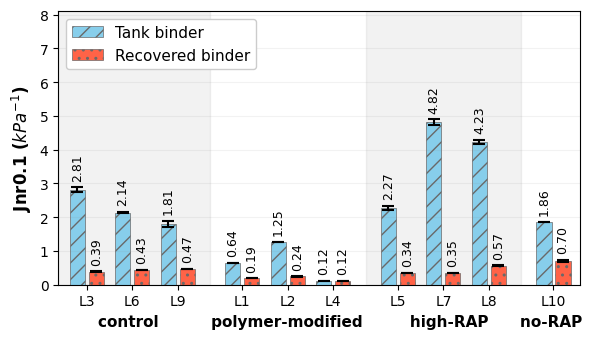

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))
ax.axvspan(xmin=-1,   xmax=7.0, color='gray', alpha=0.1)
ax.axvspan(xmin=15.2, xmax=23.4, color='gray', alpha=0.1)
XPositions = np.array([2.4 * i + j + 0.0 for i in range(0, 3) for j in range(2)] + \
                      [2.4 * i + j + 1.0 for i in range(3, 6) for j in range(2)] + \
                      [2.4 * i + j + 2.0 for i in range(6, 9) for j in range(2)] + \
                      [2.4 * i + j + 3.0 for i in range(9, 10) for j in range(2)])
ax.bar(XPositions[::2], 
       height=MSCRRes['Jnr0.1_Mean'].to_numpy()[[5, 11, 17, 1, 3, 7, 9, 13, 15, 19]], 
       yerr=MSCRRes['Jnr0.1_Std'].to_numpy()[[5, 11, 17, 1, 3, 7, 9, 13, 15, 19]], 
       width=0.8, edgecolor='dimgray', lw=0.5, color='skyblue', hatch='//', label='Tank binder',
       error_kw={'capsize': 4, 'capthick': 1.5, 'elinewidth': 1.5, 'ecolor': 'black'})
ax.bar(XPositions[1::2], 
       height=MSCRRes['Jnr0.1_Mean'].to_numpy()[[4, 10, 16, 0, 2, 6, 8, 12, 14, 18]], 
       yerr=MSCRRes['Jnr0.1_Std'].to_numpy()[[4, 10, 16, 0, 2, 6, 8, 12, 14, 18]], 
       width=0.8, edgecolor='dimgray', lw=0.5, color='tomato', hatch='..', label='Recovered binder', 
       error_kw={'capsize': 4, 'capthick': 1.5, 'elinewidth': 1.5, 'ecolor': 'black'})
ax.set_ylim([0, 8.1])
ax.set_xticks(XPositions[::2] + 0.5)
ax.set_xticklabels([f'L{i}' for i in [3, 6, 9, 1, 2, 4, 5, 7, 8, 10]], fontsize=10, color='k', rotation=0)
ax.set_ylabel('Jnr0.1 ($kPa^{-1}$)', fontsize=12, fontweight='bold', color='k')
ax.set_xlabel('        control          polymer-modified         high-RAP      no-RAP', 
              fontsize=11, fontweight='bold', color='k')
for i, idx in enumerate([4, 10, 16, 0, 2, 6, 8, 12, 14, 18]):
    ax.text(XPositions[2*i+1], MSCRRes['Jnr0.1_Mean'][idx+0] + MSCRRes['Jnr0.1_Std'][idx+0] + 0.2, 
            f'{MSCRRes["Jnr0.1_Mean"][idx+0]:.2f}', ha='center', va='bottom', fontsize=9, rotation=90)
    ax.text(XPositions[2*i+0], MSCRRes['Jnr0.1_Mean'][idx+1] + MSCRRes['Jnr0.1_Std'][idx+1] + 0.2, 
            f'{MSCRRes["Jnr0.1_Mean"][idx+1]:.2f}', ha='center', va='bottom', fontsize=9, rotation=90)
ax.set_xlim([-1.0, 26.5])
ax.grid(axis='y', color='gray', alpha=0.1)
ax.legend(fontsize=11, ncol=1, loc='upper left', framealpha=1.0)
fig.tight_layout()
# fig.savefig(os.path.join(OutputDir, f'Binder_HTPG.png'), format='png', dpi=1000)
# fig.savefig(os.path.join(OutputDir, f'Binder_HTPG.svg'), format='svg')

In [33]:
data_Tank      = {'value': [], 'group': []}
data_Recovered = {'value': [], 'group': []}
for ln in range(1, 11):
    Tank      = MSCR[(MSCR['Lane'] == ln) & (MSCR['Field_Aging'] == 'Tank binder')]
    Recovered = MSCR[(MSCR['Lane'] == ln) & (MSCR['Field_Aging'] == '0-Month')]
    for i in range(len(Tank)):
        if np.isnan(Tank.iloc[i]['Jnr0.1']): continue
        data_Tank['value'].append(Tank.iloc[i]['Jnr0.1'])
        data_Tank['group'].append(f'L{ln:02d}')
    for i in range(len(Recovered)):
        if np.isnan(Recovered.iloc[i]['Jnr0.1']): continue
        data_Recovered['value'].append(Recovered.iloc[i]['Jnr0.1'])
        data_Recovered['group'].append(f'L{ln:02d}')
data_Tank      = pd.DataFrame(data_Tank)
data_Recovered = pd.DataFrame(data_Recovered)
Pairwise_Tank,      Grouping_Tank      = Tukey_Grouping(data_Tank)
Pairwise_Recovered, Grouping_Recovered = Tukey_Grouping(data_Recovered)
Grouping_Tank.rename(columns={'Grouping': 'Grouping_Tank'}, inplace=True)
Grouping_Recovered.drop('Group', axis=1, inplace=True)
Grouping_Recovered.rename(columns={'Grouping': 'Grouping_Recovered'}, inplace=True)
pd.concat((Grouping_Tank, Grouping_Recovered), axis=1)

,Group,Grouping_Tank,Grouping_Recovered
0,L01,A,A
1,L02,B,B
2,L03,C,C
3,L04,D,D
4,L05,E,E
5,L06,E,F
6,L07,F,"C,E"
7,L08,G,G
8,L09,H,H
9,L10,H,I


_______

# Jnr diff

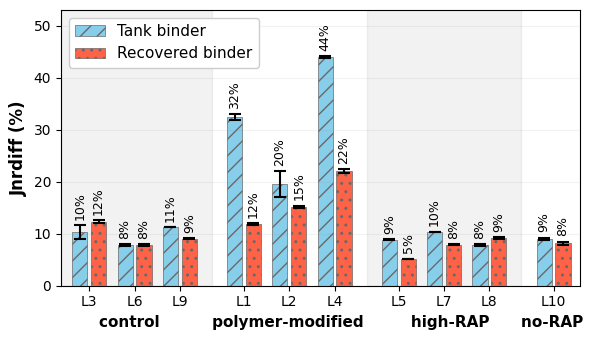

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))
ax.axvspan(xmin=-1,   xmax=7.0, color='gray', alpha=0.1)
ax.axvspan(xmin=15.2, xmax=23.4, color='gray', alpha=0.1)
XPositions = np.array([2.4 * i + j + 0.0 for i in range(0, 3) for j in range(2)] + \
                      [2.4 * i + j + 1.0 for i in range(3, 6) for j in range(2)] + \
                      [2.4 * i + j + 2.0 for i in range(6, 9) for j in range(2)] + \
                      [2.4 * i + j + 3.0 for i in range(9, 10) for j in range(2)])
ax.bar(XPositions[::2], 
       height=MSCRRes['Jnrdiff_Mean'].to_numpy()[[5, 11, 17, 1, 3, 7, 9, 13, 15, 19]], 
       yerr=MSCRRes['Jnrdiff_Std'].to_numpy()[[5, 11, 17, 1, 3, 7, 9, 13, 15, 19]], 
       width=0.8, edgecolor='dimgray', lw=0.5, color='skyblue', hatch='//', label='Tank binder',
       error_kw={'capsize': 4, 'capthick': 1.5, 'elinewidth': 1.5, 'ecolor': 'black'})
ax.bar(XPositions[1::2], 
       height=MSCRRes['Jnrdiff_Mean'].to_numpy()[[4, 10, 16, 0, 2, 6, 8, 12, 14, 18]], 
       yerr=MSCRRes['Jnrdiff_Std'].to_numpy()[[4, 10, 16, 0, 2, 6, 8, 12, 14, 18]], 
       width=0.8, edgecolor='dimgray', lw=0.5, color='tomato', hatch='..', label='Recovered binder', 
       error_kw={'capsize': 4, 'capthick': 1.5, 'elinewidth': 1.5, 'ecolor': 'black'})
ax.set_ylim([0, 53])
ax.set_xticks(XPositions[::2] + 0.5)
ax.set_xticklabels([f'L{i}' for i in [3, 6, 9, 1, 2, 4, 5, 7, 8, 10]], fontsize=10, color='k', rotation=0)
ax.set_ylabel('Jnrdiff (%)', fontsize=12, fontweight='bold', color='k')
ax.set_xlabel('        control          polymer-modified         high-RAP      no-RAP', 
              fontsize=11, fontweight='bold', color='k')
for i, idx in enumerate([4, 10, 16, 0, 2, 6, 8, 12, 14, 18]):
    ax.text(XPositions[2*i+1], 1 * (MSCRRes['Jnrdiff_Mean'][idx+0] + MSCRRes['Jnrdiff_Std'][idx+0]) + 1, 
            f'{MSCRRes["Jnrdiff_Mean"][idx+0] * 1:.0f}%', ha='center', va='bottom', fontsize=9, rotation=90)
    ax.text(XPositions[2*i+0], 1 * (MSCRRes['Jnrdiff_Mean'][idx+1] + MSCRRes['Jnrdiff_Std'][idx+1]) + 1, 
            f'{MSCRRes["Jnrdiff_Mean"][idx+1] * 1:.0f}%', ha='center', va='bottom', fontsize=9, rotation=90)
ax.set_xlim([-1.0, 26.5])
ax.grid(axis='y', color='gray', alpha=0.1)
ax.legend(fontsize=11, ncol=1, loc='upper left', framealpha=1.0)
fig.tight_layout()
# fig.savefig(os.path.join(OutputDir, f'Binder_HTPG.png'), format='png', dpi=1000)
# fig.savefig(os.path.join(OutputDir, f'Binder_HTPG.svg'), format='svg')

In [35]:
data_Tank      = {'value': [], 'group': []}
data_Recovered = {'value': [], 'group': []}
for ln in range(1, 11):
    Tank      = MSCR[(MSCR['Lane'] == ln) & (MSCR['Field_Aging'] == 'Tank binder')]
    Recovered = MSCR[(MSCR['Lane'] == ln) & (MSCR['Field_Aging'] == '0-Month')]
    for i in range(len(Tank)):
        if np.isnan(Tank.iloc[i]['Jnrdiff']): continue
        data_Tank['value'].append(Tank.iloc[i]['Jnrdiff'])
        data_Tank['group'].append(f'L{ln:02d}')
    for i in range(len(Recovered)):
        if np.isnan(Recovered.iloc[i]['Jnrdiff']): continue
        data_Recovered['value'].append(Recovered.iloc[i]['Jnrdiff'])
        data_Recovered['group'].append(f'L{ln:02d}')
data_Tank      = pd.DataFrame(data_Tank)
data_Recovered = pd.DataFrame(data_Recovered)
Pairwise_Tank,      Grouping_Tank      = Tukey_Grouping(data_Tank)
Pairwise_Recovered, Grouping_Recovered = Tukey_Grouping(data_Recovered)
Grouping_Tank.rename(columns={'Grouping': 'Grouping_Tank'}, inplace=True)
Grouping_Recovered.drop('Group', axis=1, inplace=True)
Grouping_Recovered.rename(columns={'Grouping': 'Grouping_Recovered'}, inplace=True)
pd.concat((Grouping_Tank, Grouping_Recovered), axis=1)

,Group,Grouping_Tank,Grouping_Recovered
0,L01,A,A
1,L02,B,B
2,L03,C,A
3,L04,D,C
4,L05,C,D
5,L06,C,E
6,L07,C,E
7,L08,C,F
8,L09,C,F
9,L10,C,E


## Plot all Jnr values on the same plot. 


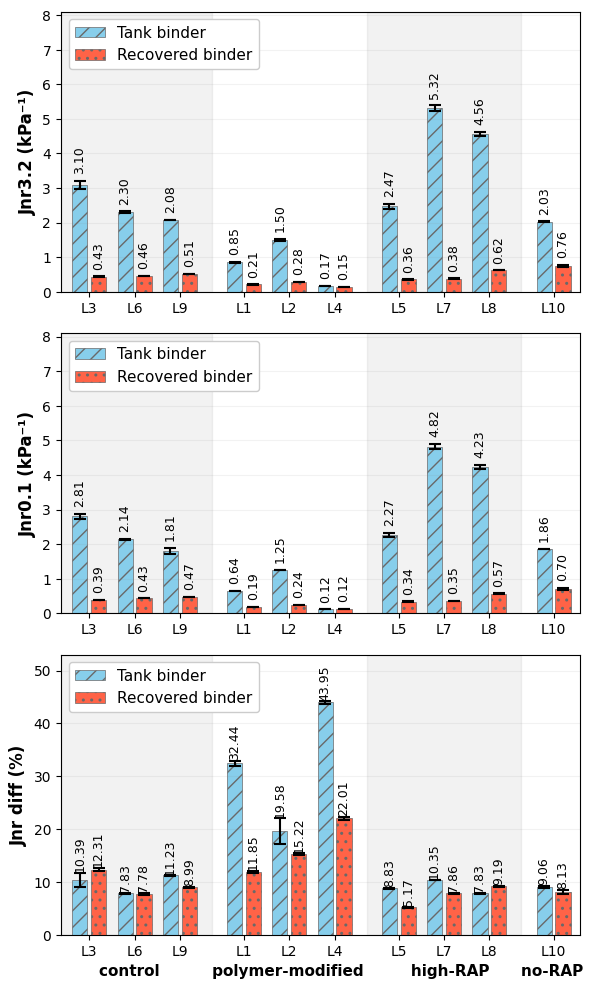

In [36]:
fig, axes = plt.subplots(3, 1, figsize=(6, 10))
XPositions = np.array([2.4 * i + j + 0.0 for i in range(0, 3) for j in range(2)] + \
                      [2.4 * i + j + 1.0 for i in range(3, 6) for j in range(2)] + \
                      [2.4 * i + j + 2.0 for i in range(6, 9) for j in range(2)] + \
                      [2.4 * i + j + 3.0 for i in range(9, 10) for j in range(2)])
Labels = [f'Jnr3.2 (kPa⁻¹)', f'Jnr0.1 (kPa⁻¹)', f'Jnr diff (%)']
# Put the shades under the bars. 
for ax in axes:
    ax.axvspan(xmin=-1,   xmax=7.0, color='gray', alpha=0.1)
    ax.axvspan(xmin=15.2, xmax=23.4, color='gray', alpha=0.1)
# Plot the bars. 
for ax, key in zip(axes, ['Jnr3.2', 'Jnr0.1', 'Jnrdiff']):
    ax.bar(XPositions[::2], 
        height=MSCRRes[f'{key}_Mean'].to_numpy()[[5, 11, 17, 1, 3, 7, 9, 13, 15, 19]], 
        yerr=MSCRRes[f'{key}_Std'].to_numpy()[[5, 11, 17, 1, 3, 7, 9, 13, 15, 19]], 
        width=0.8, edgecolor='dimgray', lw=0.5, color='skyblue', hatch='//', label='Tank binder',
        error_kw={'capsize': 4, 'capthick': 1.5, 'elinewidth': 1.5, 'ecolor': 'black'})
    ax.bar(XPositions[1::2], 
        height=MSCRRes[f'{key}_Mean'].to_numpy()[[4, 10, 16, 0, 2, 6, 8, 12, 14, 18]], 
        yerr=MSCRRes[f'{key}_Std'].to_numpy()[[4, 10, 16, 0, 2, 6, 8, 12, 14, 18]], 
        width=0.8, edgecolor='dimgray', lw=0.5, color='tomato', hatch='..', label='Recovered binder', 
        error_kw={'capsize': 4, 'capthick': 1.5, 'elinewidth': 1.5, 'ecolor': 'black'})
    for i, idx in enumerate([4, 10, 16, 0, 2, 6, 8, 12, 14, 18]):
        ax.text(XPositions[2*i+1], MSCRRes[f'{key}_Mean'][idx+0] + MSCRRes[f'{key}_Std'][idx+0] + 0.2, 
                f'{MSCRRes[f"{key}_Mean"][idx+0]:.2f}', ha='center', va='bottom', fontsize=9, rotation=90)
        ax.text(XPositions[2*i+0], MSCRRes[f'{key}_Mean'][idx+1] + MSCRRes[f'{key}_Std'][idx+1] + 0.2, 
                f'{MSCRRes[f"{key}_Mean"][idx+1]:.2f}', ha='center', va='bottom', fontsize=9, rotation=90)
# General stuff. 
for i, ax in enumerate(axes):
    ax.set_ylim([0, 8.1])
    ax.set_xticks(XPositions[::2] + 0.5)
    ax.set_xticklabels([f'L{i}' for i in [3, 6, 9, 1, 2, 4, 5, 7, 8, 10]], fontsize=10, color='k', rotation=0)
    ax.set_ylabel(Labels[i], fontsize=12, fontweight='bold', color='k')
    ax.set_xlim([-1.0, 26.5])
    ax.grid(axis='y', color='gray', alpha=0.1)
    ax.legend(fontsize=11, ncol=1, loc='upper left', framealpha=1.0)
    if i == 2:
        ax.set_ylim([0, 53])
axes[2].set_xlabel('        control          polymer-modified         high-RAP      no-RAP', 
                 fontsize=11, fontweight='bold', color='k')
fig.tight_layout()

_____

Percent Recoveries 

# R3.2

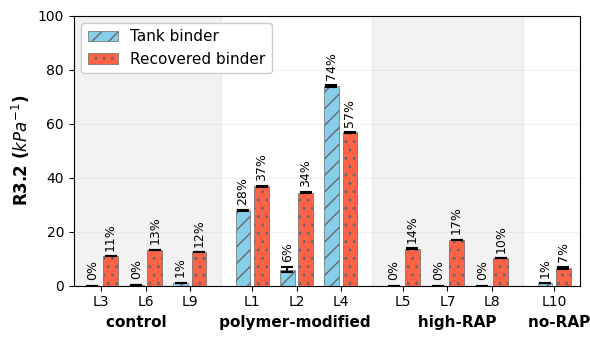

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))
ax.axvspan(xmin=-1,   xmax=7.0, color='gray', alpha=0.1)
ax.axvspan(xmin=15.2, xmax=23.4, color='gray', alpha=0.1)
XPositions = np.array([2.4 * i + j + 0.0 for i in range(0, 3) for j in range(2)] + \
                      [2.4 * i + j + 1.0 for i in range(3, 6) for j in range(2)] + \
                      [2.4 * i + j + 2.0 for i in range(6, 9) for j in range(2)] + \
                      [2.4 * i + j + 3.0 for i in range(9, 10) for j in range(2)])
ax.bar(XPositions[::2], 
       height=MSCRRes['R3.2_Mean'].to_numpy()[[5, 11, 17, 1, 3, 7, 9, 13, 15, 19]], 
       yerr=MSCRRes['R3.2_Std'].to_numpy()[[5, 11, 17, 1, 3, 7, 9, 13, 15, 19]], 
       width=0.8, edgecolor='dimgray', lw=0.5, color='skyblue', hatch='//', label='Tank binder',
       error_kw={'capsize': 4, 'capthick': 1.5, 'elinewidth': 1.5, 'ecolor': 'black'})
ax.bar(XPositions[1::2], 
       height=MSCRRes['R3.2_Mean'].to_numpy()[[4, 10, 16, 0, 2, 6, 8, 12, 14, 18]], 
       yerr=MSCRRes['R3.2_Std'].to_numpy()[[4, 10, 16, 0, 2, 6, 8, 12, 14, 18]], 
       width=0.8, edgecolor='dimgray', lw=0.5, color='tomato', hatch='..', label='Recovered binder', 
       error_kw={'capsize': 4, 'capthick': 1.5, 'elinewidth': 1.5, 'ecolor': 'black'})
ax.set_ylim([0, 100])
ax.set_xticks(XPositions[::2] + 0.5)
ax.set_xticklabels([f'L{i}' for i in [3, 6, 9, 1, 2, 4, 5, 7, 8, 10]], fontsize=10, color='k', rotation=0)
ax.set_ylabel('R3.2 ($kPa^{-1}$)', fontsize=12, fontweight='bold', color='k')
ax.set_xlabel('        control          polymer-modified         high-RAP      no-RAP', 
              fontsize=11, fontweight='bold', color='k')
for i, idx in enumerate([4, 10, 16, 0, 2, 6, 8, 12, 14, 18]):
    ax.text(XPositions[2*i+1], MSCRRes['R3.2_Mean'][idx+0] + MSCRRes['R3.2_Std'][idx+0] + 2, 
            f'{MSCRRes["R3.2_Mean"][idx+0]:.0f}%', ha='center', va='bottom', fontsize=9, rotation=90)
    ax.text(XPositions[2*i+0], MSCRRes['R3.2_Mean'][idx+1] + MSCRRes['R3.2_Std'][idx+1] + 2, 
            f'{MSCRRes["R3.2_Mean"][idx+1]:.0f}%', ha='center', va='bottom', fontsize=9, rotation=90)
ax.set_xlim([-1.0, 26.5])
ax.grid(axis='y', color='gray', alpha=0.1)
ax.legend(fontsize=11, ncol=1, loc='upper left', framealpha=1.0)
fig.tight_layout()
# fig.savefig(os.path.join(OutputDir, f'Binder_HTPG.png'), format='png', dpi=1000)
# fig.savefig(os.path.join(OutputDir, f'Binder_HTPG.svg'), format='svg')

In [38]:
data_Tank      = {'value': [], 'group': []}
data_Recovered = {'value': [], 'group': []}
for ln in range(1, 11):
    Tank      = MSCR[(MSCR['Lane'] == ln) & (MSCR['Field_Aging'] == 'Tank binder')]
    Recovered = MSCR[(MSCR['Lane'] == ln) & (MSCR['Field_Aging'] == '0-Month')]
    for i in range(len(Tank)):
        if np.isnan(Tank.iloc[i]['R3.2']): continue
        data_Tank['value'].append(Tank.iloc[i]['R3.2'])
        data_Tank['group'].append(f'L{ln:02d}')
    for i in range(len(Recovered)):
        if np.isnan(Recovered.iloc[i]['R3.2']): continue
        data_Recovered['value'].append(Recovered.iloc[i]['R3.2'])
        data_Recovered['group'].append(f'L{ln:02d}')
data_Tank      = pd.DataFrame(data_Tank)
data_Recovered = pd.DataFrame(data_Recovered)
Pairwise_Tank,      Grouping_Tank      = Tukey_Grouping(data_Tank)
Pairwise_Recovered, Grouping_Recovered = Tukey_Grouping(data_Recovered)
Grouping_Tank.rename(columns={'Grouping': 'Grouping_Tank'}, inplace=True)
Grouping_Recovered.drop('Group', axis=1, inplace=True)
Grouping_Recovered.rename(columns={'Grouping': 'Grouping_Recovered'}, inplace=True)
pd.concat((Grouping_Tank, Grouping_Recovered), axis=1)

,Group,Grouping_Tank,Grouping_Recovered
0,L01,A,A
1,L02,B,B
2,L03,C,C
3,L04,D,D
4,L05,C,E
5,L06,"C,E",F
6,L07,C,G
7,L08,C,H
8,L09,"E,F",I
9,L10,"C,F",J


# R0.1

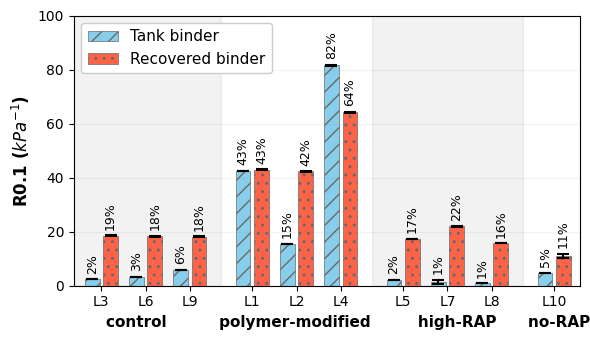

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))
ax.axvspan(xmin=-1,   xmax=7.0, color='gray', alpha=0.1)
ax.axvspan(xmin=15.2, xmax=23.4, color='gray', alpha=0.1)
XPositions = np.array([2.4 * i + j + 0.0 for i in range(0, 3) for j in range(2)] + \
                      [2.4 * i + j + 1.0 for i in range(3, 6) for j in range(2)] + \
                      [2.4 * i + j + 2.0 for i in range(6, 9) for j in range(2)] + \
                      [2.4 * i + j + 3.0 for i in range(9, 10) for j in range(2)])
ax.bar(XPositions[::2], 
       height=MSCRRes['R0.1_Mean'].to_numpy()[[5, 11, 17, 1, 3, 7, 9, 13, 15, 19]], 
       yerr=MSCRRes['R0.1_Std'].to_numpy()[[5, 11, 17, 1, 3, 7, 9, 13, 15, 19]], 
       width=0.8, edgecolor='dimgray', lw=0.5, color='skyblue', hatch='//', label='Tank binder',
       error_kw={'capsize': 4, 'capthick': 1.5, 'elinewidth': 1.5, 'ecolor': 'black'})
ax.bar(XPositions[1::2], 
       height=MSCRRes['R0.1_Mean'].to_numpy()[[4, 10, 16, 0, 2, 6, 8, 12, 14, 18]], 
       yerr=MSCRRes['R0.1_Std'].to_numpy()[[4, 10, 16, 0, 2, 6, 8, 12, 14, 18]], 
       width=0.8, edgecolor='dimgray', lw=0.5, color='tomato', hatch='..', label='Recovered binder', 
       error_kw={'capsize': 4, 'capthick': 1.5, 'elinewidth': 1.5, 'ecolor': 'black'})
ax.set_ylim([0, 100])
ax.set_xticks(XPositions[::2] + 0.5)
ax.set_xticklabels([f'L{i}' for i in [3, 6, 9, 1, 2, 4, 5, 7, 8, 10]], fontsize=10, color='k', rotation=0)
ax.set_ylabel('R0.1 ($kPa^{-1}$)', fontsize=12, fontweight='bold', color='k')
ax.set_xlabel('        control          polymer-modified         high-RAP      no-RAP', 
              fontsize=11, fontweight='bold', color='k')
for i, idx in enumerate([4, 10, 16, 0, 2, 6, 8, 12, 14, 18]):
    ax.text(XPositions[2*i+1], MSCRRes['R0.1_Mean'][idx+0] + MSCRRes['R0.1_Std'][idx+0] + 2, 
            f'{MSCRRes["R0.1_Mean"][idx+0]:.0f}%', ha='center', va='bottom', fontsize=9, rotation=90)
    ax.text(XPositions[2*i+0], MSCRRes['R0.1_Mean'][idx+1] + MSCRRes['R0.1_Std'][idx+1] + 2, 
            f'{MSCRRes["R0.1_Mean"][idx+1]:.0f}%', ha='center', va='bottom', fontsize=9, rotation=90)
ax.set_xlim([-1.0, 26.5])
ax.grid(axis='y', color='gray', alpha=0.1)
ax.legend(fontsize=11, ncol=1, loc='upper left', framealpha=1.0)
fig.tight_layout()
# fig.savefig(os.path.join(OutputDir, f'Binder_HTPG.png'), format='png', dpi=1000)
# fig.savefig(os.path.join(OutputDir, f'Binder_HTPG.svg'), format='svg')

In [40]:
data_Tank      = {'value': [], 'group': []}
data_Recovered = {'value': [], 'group': []}
for ln in range(1, 11):
    Tank      = MSCR[(MSCR['Lane'] == ln) & (MSCR['Field_Aging'] == 'Tank binder')]
    Recovered = MSCR[(MSCR['Lane'] == ln) & (MSCR['Field_Aging'] == '0-Month')]
    for i in range(len(Tank)):
        if np.isnan(Tank.iloc[i]['R0.1']): continue
        data_Tank['value'].append(Tank.iloc[i]['R0.1'])
        data_Tank['group'].append(f'L{ln:02d}')
    for i in range(len(Recovered)):
        if np.isnan(Recovered.iloc[i]['R0.1']): continue
        data_Recovered['value'].append(Recovered.iloc[i]['R0.1'])
        data_Recovered['group'].append(f'L{ln:02d}')
data_Tank      = pd.DataFrame(data_Tank)
data_Recovered = pd.DataFrame(data_Recovered)
Pairwise_Tank,      Grouping_Tank      = Tukey_Grouping(data_Tank)
Pairwise_Recovered, Grouping_Recovered = Tukey_Grouping(data_Recovered)
Grouping_Tank.rename(columns={'Grouping': 'Grouping_Tank'}, inplace=True)
Grouping_Recovered.drop('Group', axis=1, inplace=True)
Grouping_Recovered.rename(columns={'Grouping': 'Grouping_Recovered'}, inplace=True)
pd.concat((Grouping_Tank, Grouping_Recovered), axis=1)

,Group,Grouping_Tank,Grouping_Recovered
0,L01,A,A
1,L02,B,A
2,L03,C,B
3,L04,D,C
4,L05,"C,E",D
5,L06,C,B
6,L07,"E,F",E
7,L08,F,F
8,L09,G,"B,D"
9,L10,H,G


# R diff

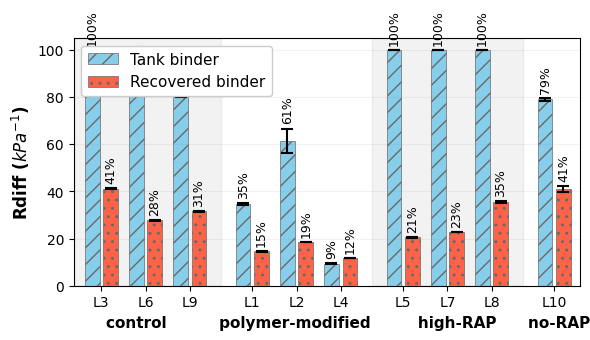

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))
ax.axvspan(xmin=-1,   xmax=7.0, color='gray', alpha=0.1)
ax.axvspan(xmin=15.2, xmax=23.4, color='gray', alpha=0.1)
XPositions = np.array([2.4 * i + j + 0.0 for i in range(0, 3) for j in range(2)] + \
                      [2.4 * i + j + 1.0 for i in range(3, 6) for j in range(2)] + \
                      [2.4 * i + j + 2.0 for i in range(6, 9) for j in range(2)] + \
                      [2.4 * i + j + 3.0 for i in range(9, 10) for j in range(2)])
ax.bar(XPositions[::2], 
       height=MSCRRes['Rdiff_Mean'].to_numpy()[[5, 11, 17, 1, 3, 7, 9, 13, 15, 19]], 
       yerr=MSCRRes['Rdiff_Std'].to_numpy()[[5, 11, 17, 1, 3, 7, 9, 13, 15, 19]], 
       width=0.8, edgecolor='dimgray', lw=0.5, color='skyblue', hatch='//', label='Tank binder',
       error_kw={'capsize': 4, 'capthick': 1.5, 'elinewidth': 1.5, 'ecolor': 'black'})
ax.bar(XPositions[1::2], 
       height=MSCRRes['Rdiff_Mean'].to_numpy()[[4, 10, 16, 0, 2, 6, 8, 12, 14, 18]], 
       yerr=MSCRRes['Rdiff_Std'].to_numpy()[[4, 10, 16, 0, 2, 6, 8, 12, 14, 18]], 
       width=0.8, edgecolor='dimgray', lw=0.5, color='tomato', hatch='..', label='Recovered binder', 
       error_kw={'capsize': 4, 'capthick': 1.5, 'elinewidth': 1.5, 'ecolor': 'black'})
# ax.set_ylim([0, 100])
ax.set_xticks(XPositions[::2] + 0.5)
ax.set_xticklabels([f'L{i}' for i in [3, 6, 9, 1, 2, 4, 5, 7, 8, 10]], fontsize=10, color='k', rotation=0)
ax.set_ylabel('Rdiff ($kPa^{-1}$)', fontsize=12, fontweight='bold', color='k')
ax.set_xlabel('        control          polymer-modified         high-RAP      no-RAP', 
              fontsize=11, fontweight='bold', color='k')
for i, idx in enumerate([4, 10, 16, 0, 2, 6, 8, 12, 14, 18]):
    ax.text(XPositions[2*i+1], MSCRRes['Rdiff_Mean'][idx+0] + MSCRRes['Rdiff_Std'][idx+0] + 2, 
            f'{MSCRRes["Rdiff_Mean"][idx+0]:.0f}%', ha='center', va='bottom', fontsize=9, rotation=90)
    ax.text(XPositions[2*i+0], MSCRRes['Rdiff_Mean'][idx+1] + MSCRRes['Rdiff_Std'][idx+1] + 2, 
            f'{MSCRRes["Rdiff_Mean"][idx+1]:.0f}%', ha='center', va='bottom', fontsize=9, rotation=90)
ax.set_xlim([-1.0, 26.5])
ax.grid(axis='y', color='gray', alpha=0.1)
ax.legend(fontsize=11, ncol=1, loc='upper left', framealpha=1.0)
fig.tight_layout()
# fig.savefig(os.path.join(OutputDir, f'Binder_HTPG.png'), format='png', dpi=1000)
# fig.savefig(os.path.join(OutputDir, f'Binder_HTPG.svg'), format='svg')

________

# Plots for the paper. 

Triple plot with Jnr3.2, Jnrdiff, and R3.2

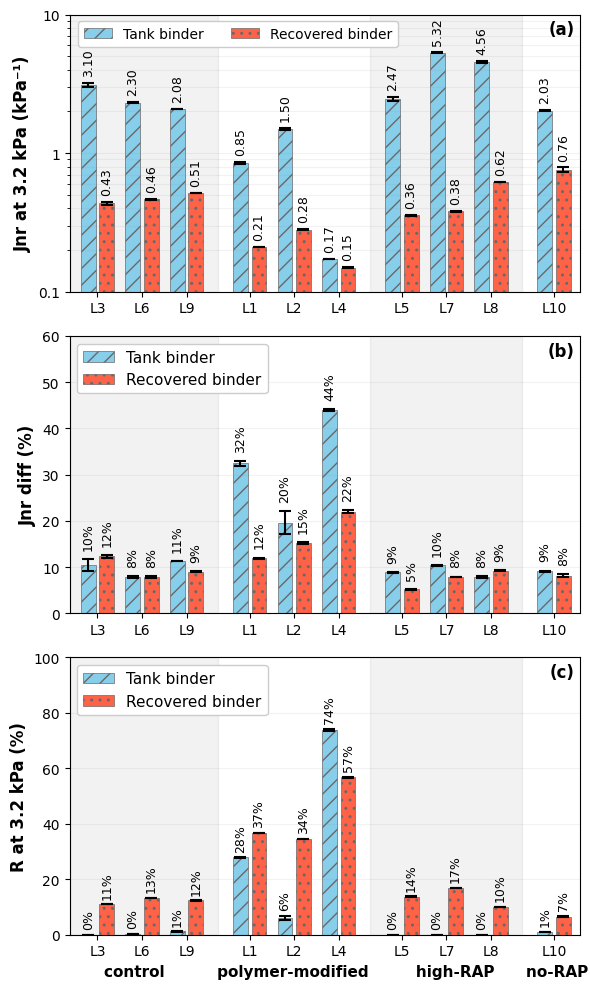

In [42]:
fig, axes = plt.subplots(3, 1, figsize=(6, 10))
XPositions = np.array([2.4 * i + j + 0.0 for i in range(0, 3) for j in range(2)] + \
                      [2.4 * i + j + 1.0 for i in range(3, 6) for j in range(2)] + \
                      [2.4 * i + j + 2.0 for i in range(6, 9) for j in range(2)] + \
                      [2.4 * i + j + 3.0 for i in range(9, 10) for j in range(2)])
Labels = [f'Jnr at 3.2 kPa (kPa⁻¹)', f'Jnr diff (%)', f'R at 3.2 kPa (%)']
MaxYlim = [8.1, 60, 100]
# Put the shades under the bars. 
for ax in axes:
    ax.axvspan(xmin=-1,   xmax=7.0, color='gray', alpha=0.1)
    ax.axvspan(xmin=15.2, xmax=23.4, color='gray', alpha=0.1)
# Plot the bars. 
for ax, key in zip(axes, ['Jnr3.2', 'Jnrdiff', 'R3.2']):
    ax.bar(XPositions[::2], 
        height=MSCRRes[f'{key}_Mean'].to_numpy()[[5, 11, 17, 1, 3, 7, 9, 13, 15, 19]], 
        yerr=MSCRRes[f'{key}_Std'].to_numpy()[[5, 11, 17, 1, 3, 7, 9, 13, 15, 19]], 
        width=0.8, edgecolor='dimgray', lw=0.5, color='skyblue', hatch='//', label='Tank binder',
        error_kw={'capsize': 4, 'capthick': 1.5, 'elinewidth': 1.5, 'ecolor': 'black'})
    ax.bar(XPositions[1::2], 
        height=MSCRRes[f'{key}_Mean'].to_numpy()[[4, 10, 16, 0, 2, 6, 8, 12, 14, 18]], 
        yerr=MSCRRes[f'{key}_Std'].to_numpy()[[4, 10, 16, 0, 2, 6, 8, 12, 14, 18]], 
        width=0.8, edgecolor='dimgray', lw=0.5, color='tomato', hatch='..', label='Recovered binder', 
        error_kw={'capsize': 4, 'capthick': 1.5, 'elinewidth': 1.5, 'ecolor': 'black'})
for i, idx in enumerate([4, 10, 16, 0, 2, 6, 8, 12, 14, 18]):
    key = 'Jnr3.2'
    axes[0].text(XPositions[2*i+1], 10 ** (np.log10(MSCRRes[f'{key}_Mean'][idx+0] + MSCRRes[f'{key}_Std'][idx+0]) + 0.05), 
            f'{MSCRRes[f"{key}_Mean"][idx+0]:.2f}', ha='center', va='bottom', fontsize=9, rotation=90)
    axes[0].text(XPositions[2*i+0], 10 ** (np.log10(MSCRRes[f'{key}_Mean'][idx+1] + MSCRRes[f'{key}_Std'][idx+1]) + 0.05), 
            f'{MSCRRes[f"{key}_Mean"][idx+1]:.2f}', ha='center', va='bottom', fontsize=9, rotation=90)
    key = 'Jnrdiff'
    axes[1].text(XPositions[2*i+1], MSCRRes[f'{key}_Mean'][idx+0] + MSCRRes[f'{key}_Std'][idx+0] + 2, 
            f'{MSCRRes[f"{key}_Mean"][idx+0]:.0f}%', ha='center', va='bottom', fontsize=9, rotation=90)
    axes[1].text(XPositions[2*i+0], MSCRRes[f'{key}_Mean'][idx+1] + MSCRRes[f'{key}_Std'][idx+1] + 2, 
            f'{MSCRRes[f"{key}_Mean"][idx+1]:.0f}%', ha='center', va='bottom', fontsize=9, rotation=90)
    key = 'R3.2'
    axes[2].text(XPositions[2*i+1], MSCRRes[f'{key}_Mean'][idx+0] + MSCRRes[f'{key}_Std'][idx+0] + 2, 
            f'{MSCRRes[f"{key}_Mean"][idx+0]:.0f}%', ha='center', va='bottom', fontsize=9, rotation=90)
    axes[2].text(XPositions[2*i+0], MSCRRes[f'R3.2_Mean'][idx+1] + MSCRRes[f'{key}_Std'][idx+1] + 2, 
            f'{MSCRRes[f"{key}_Mean"][idx+1]:.0f}%', ha='center', va='bottom', fontsize=9, rotation=90)
# General stuff. 
for i, ax in enumerate(axes):
    ax.set_ylim([0, MaxYlim[i]])
    ax.set_xticks(XPositions[::2] + 0.5)
    ax.set_xticklabels([f'L{i}' for i in [3, 6, 9, 1, 2, 4, 5, 7, 8, 10]], fontsize=10, color='k', rotation=0)
    ax.set_ylabel(Labels[i], fontsize=12, fontweight='bold', color='k')
    ax.set_xlim([-1.0, 26.5])
    ax.grid(axis='y', color='gray', alpha=0.1)
    ax.legend(fontsize=11, ncol=1, loc='upper left', framealpha=1.0)
    ax.text(0.99, 0.98, ['(a)', '(b)', '(c)'][i], transform=ax.transAxes, 
            fontsize=12, fontweight='bold', va='top', ha='right')
axes[2].set_xlabel('        control          polymer-modified         high-RAP      no-RAP', 
                 fontsize=11, fontweight='bold', color='k')
axes[0].set_yscale('log')
axes[0].set_ylim([0.1, 10])
axes[0].yaxis.grid(True, which='both', color='gray', alpha=0.1)
axes[0].set_yticks([0.1, 1, 10])
axes[0].set_yticklabels(['0.1', '1', '10'])
axes[0].legend(loc='upper center', bbox_to_anchor=(0.33, 1.00), bbox_transform=axes[0].transAxes, framealpha=1.0, ncol=2)
# axes[0].legend(fontsize=11, ncol=1, loc='upper center', framealpha=1.0)
fig.tight_layout()
# fig.savefig(os.path.join(OutputDir, f'Binder_MSCR_Jnr_Jnrdiff_R.png'), format='png', dpi=1000)
# fig.savefig(os.path.join(OutputDir, f'Binder_MSCR_Jnr_Jnrdiff_R.svg'), format='svg')

In [43]:
# perform t-test statistics for Jnr,3.2 and R3.2. 
statistic, pval = ttest_ind(MSCR[MSCR['Field_Aging'] == '0-Month']['Jnr3.2'].to_numpy(),
                            MSCR[MSCR['Field_Aging'] == 'Tank binder']['Jnr3.2'].to_numpy())
print(f'Different in Tank and Recovered Jnr,3.2 values: p-value: {pval:.3e}')
statistic, pval = ttest_ind(MSCR[(MSCR['Field_Aging'] == '0-Month') & (MSCR['Lane'].isin([3,6,9,5,7,8,10]))]['R3.2'].to_numpy(),
                            MSCR[(MSCR['Field_Aging'] == 'Tank binder') & (MSCR['Lane'].isin([3,6,9,5,7,8,10]))]['R3.2'].to_numpy())
print(f'Different in Tank and Recovered R3.2 values (non-polymer-modified binders): p-value: {pval:.3e}')

Different in Tank and Recovered Jnr,3.2 values: p-value: 1.051e-09
Different in Tank and Recovered R3.2 values (non-polymer-modified binders): p-value: 5.939e-20


In [44]:
statistic, pval = ttest_ind(MSCR[(MSCR['Field_Aging'] == '0-Month') & (MSCR['Lane'].isin([3,6,9,5,7,8,10]))]['Jnr3.2'].to_numpy(),
                            MSCR[(MSCR['Field_Aging'] == '0-Month') & (MSCR['Lane'].isin([1,2,4]))]['Jnr3.2'].to_numpy())
print(f'Different in Recovered binder Jnr3.2 values (polymer-modified against other binders): p-value: {pval:.3e}')
statistic, pval = ttest_ind(MSCR[(MSCR['Field_Aging'] == 'Tank binder') & (MSCR['Lane'].isin([3,6,9,5,7,8,10]))]['Jnr3.2'].to_numpy(),
                            MSCR[(MSCR['Field_Aging'] == 'Tank binder') & (MSCR['Lane'].isin([1,2,4]))]['Jnr3.2'].to_numpy())
print(f'Different in Tank binder Jnr3.2 values (polymer-modified against other binders): p-value: {pval:.3e}')
statistic, pval = ttest_ind(MSCR[(MSCR['Field_Aging'] == '0-Month') & (MSCR['Lane'].isin([3,6,9,5,7,8,10]))]['R3.2'].to_numpy(),
                            MSCR[(MSCR['Field_Aging'] == '0-Month') & (MSCR['Lane'].isin([1,2,4]))]['R3.2'].to_numpy())
print(f'Different in Recovered binder R3.2 values (polymer-modified against other binders): p-value: {pval:.3e}')
statistic, pval = ttest_ind(MSCR[(MSCR['Field_Aging'] == 'Tank binder') & (MSCR['Lane'].isin([3,6,9,5,7,8,10]))]['R3.2'].to_numpy(),
                            MSCR[(MSCR['Field_Aging'] == 'Tank binder') & (MSCR['Lane'].isin([1,2,4]))]['R3.2'].to_numpy())
print(f'Different in Tank binder R3.2 values (polymer-modified against other binders): p-value: {pval:.3e}')

Different in Recovered binder Jnr3.2 values (polymer-modified against other binders): p-value: 1.253e-06
Different in Tank binder Jnr3.2 values (polymer-modified against other binders): p-value: 1.478e-05
Different in Recovered binder R3.2 values (polymer-modified against other binders): p-value: 7.910e-13
Different in Tank binder R3.2 values (polymer-modified against other binders): p-value: 6.086e-06


In [45]:
# Save the MSCR results in a Pickle file, to study the correlations. 
pickle.dump(MSCR, open('./Data/ProcessedData_MSCR.pkl', 'wb'))